In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter

from src.processing.constants import *
from src.processing.utils import list_files
from src.processing.txt_loading import txt_to_list
from src.processing.radial import radial_select, order_coords, create_radius_select_stack, find_period_radial_select
from src.processing.constants import BUCKLING_PATH, EDGE_TRACKING_PATH
from src.processing.autocorrelation import autocorrelate_single_value, autocorrelate_radial_ring
from src.processing.wrinkle_period import find_period_autocorrelation_fft, periods_from_image, periods_multiple_radii
from src.processing.crosscorrelation import crosscorrelation_0_to_j
import pandas as pd

Load stack and image

In [2]:
bio_image = imread(str(BUCKLING_PATH / "200920_biolight_nobg_nooutliers_despeckle_enhance.tif"))

In [29]:
slice = 120
image = bio_image[slice]

In [30]:
height, width = np.shape(image)
height, width

(1040, 1388)

Create centres and radii lists

In [31]:
timestamps_b, radii_b, x_center_b, y_center_b = txt_to_list(str(EDGE_TRACKING_PATH/'200920_biolight_fitted_circle_position_data.txt'))
x_center, y_center = x_center_b[slice], y_center_b[slice]
center_fitted = (x_center, y_center)
coffee_ring_radius = radii_b[0]
coffee_ring_radius

213.617163424972

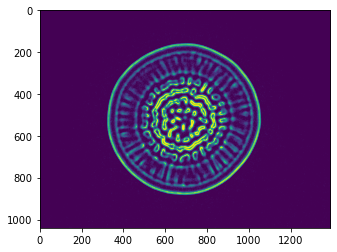

In [12]:
plt.imshow(bio_image[100])

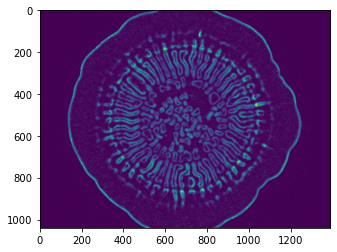

In [16]:
plt.imshow(bio_image[250])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

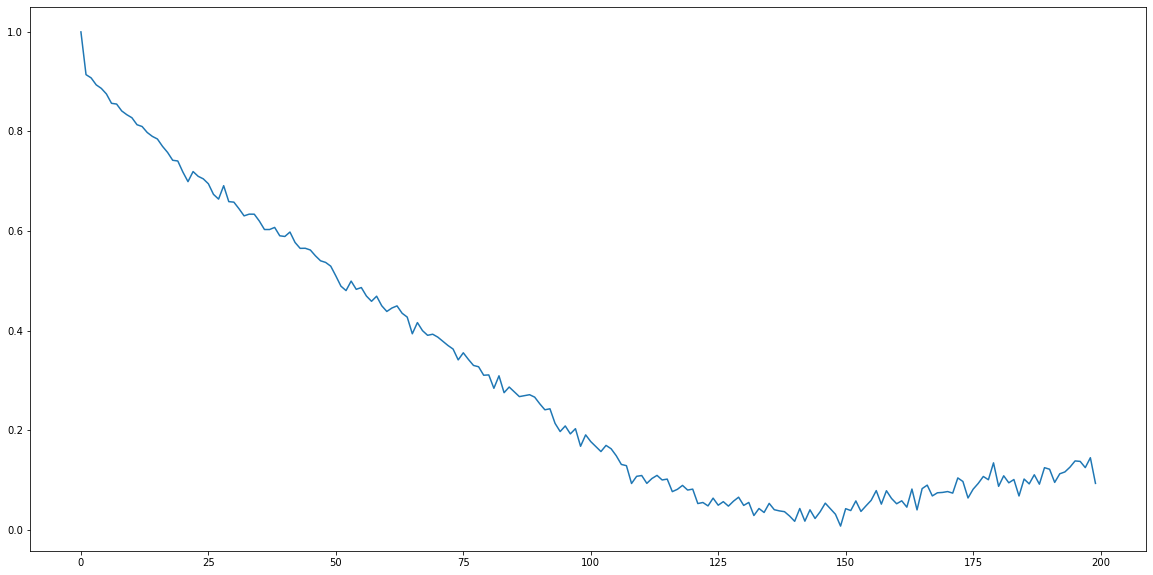

In [18]:
crosscorrelation_0_to_j(bio_image, 100, 300, x_center_b, y_center_b, 300, plot=True)

Select radial slice and plot for sanity check

In [27]:
stack = create_radius_select_stack(bio_image[120], center_fitted, target_radius = 400, tolerance = 0.5)
data = stack[2]

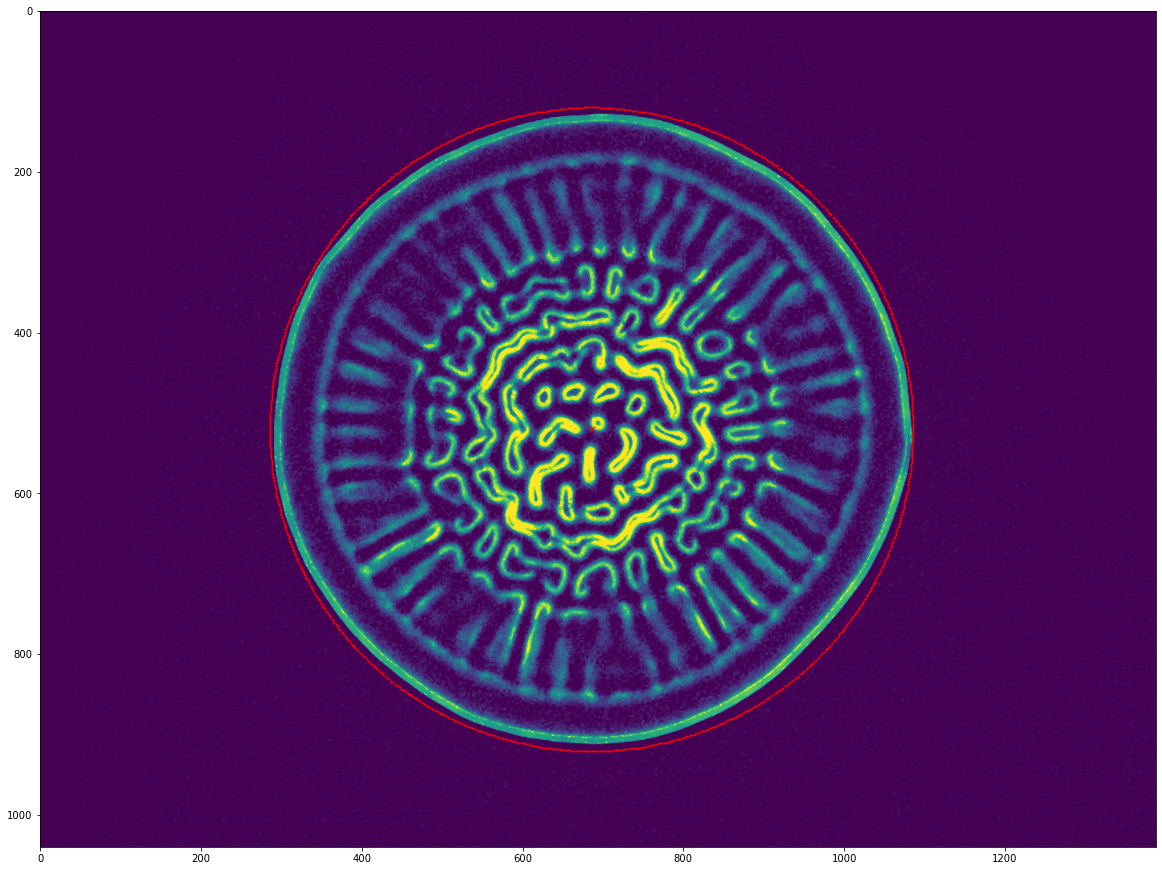

In [28]:
fig, ax = plt.subplots(1,1, figsize=(20, 20))
ax.imshow(bio_image[120])
ax.plot(x_center, y_center, 'xr')
ax.plot(stack[0][::2], stack[1][::2], 'ro', ms = 1)
ax.set_aspect('equal')
plt.show()

Plot radial intensity profile

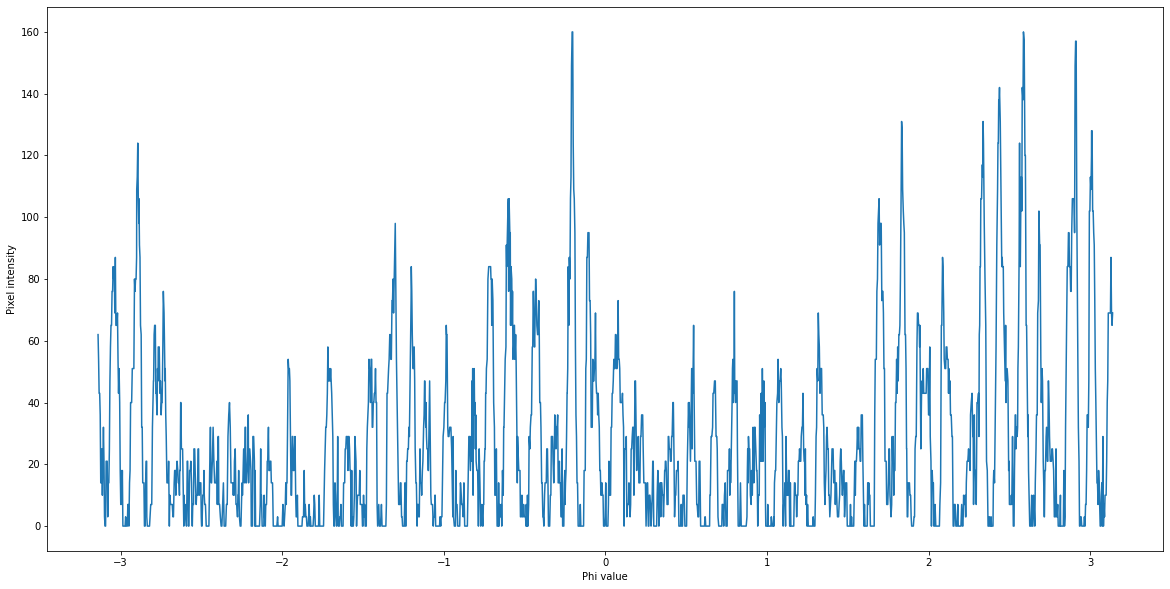

In [35]:
plt.figure(figsize=(20,10))
plt.plot(stack[3], stack[2])
plt.xlabel('Phi value')
plt.ylabel('Pixel intensity')
plt.show()

Perform autocorrelation

In [9]:
lags, autocorrelation = autocorrelate_radial_ring(data)

Plot autocorrelation and peaks

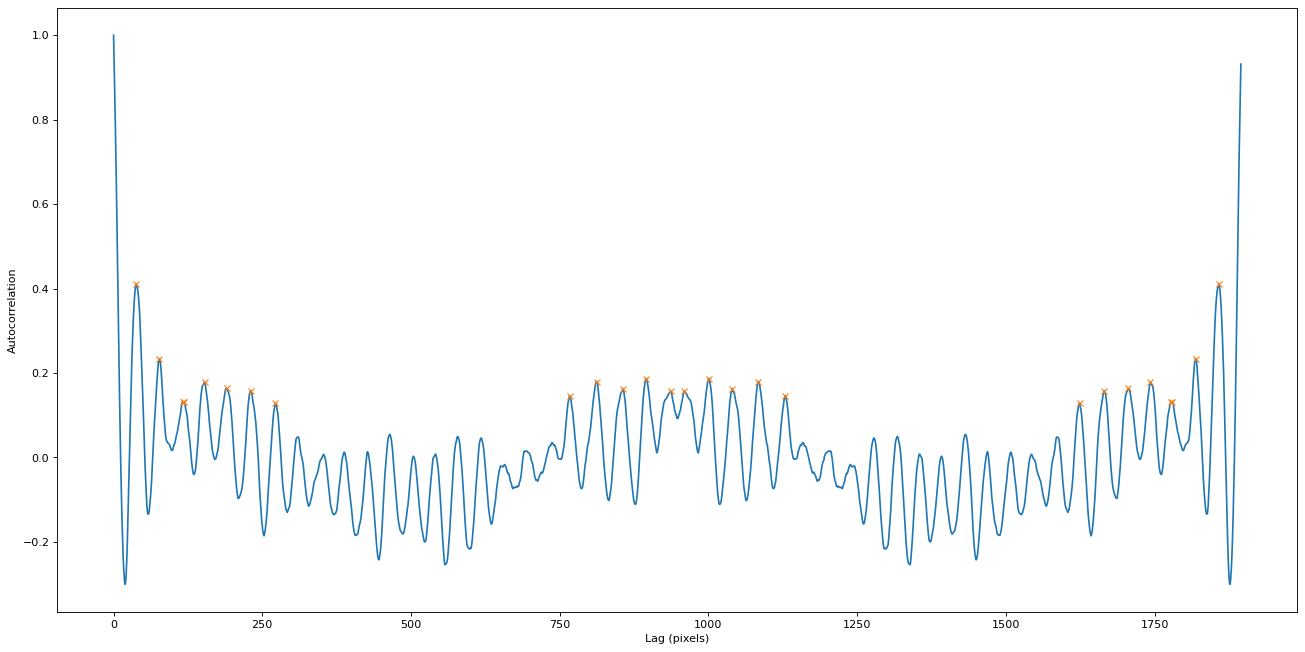

1896

In [10]:
peaks, _ = find_peaks(autocorrelation, height=0.1)

plt.figure(figsize=(20, 10), dpi=80)
plt.plot(lags, autocorrelation)
plt.plot(lags[peaks], autocorrelation[peaks], "x")
plt.xlabel('Lag (pixels)')
plt.ylabel('Autocorrelation')
plt.show()
len(autocorrelation)


Find period of wrinkles at certain slice


no peaks =  2


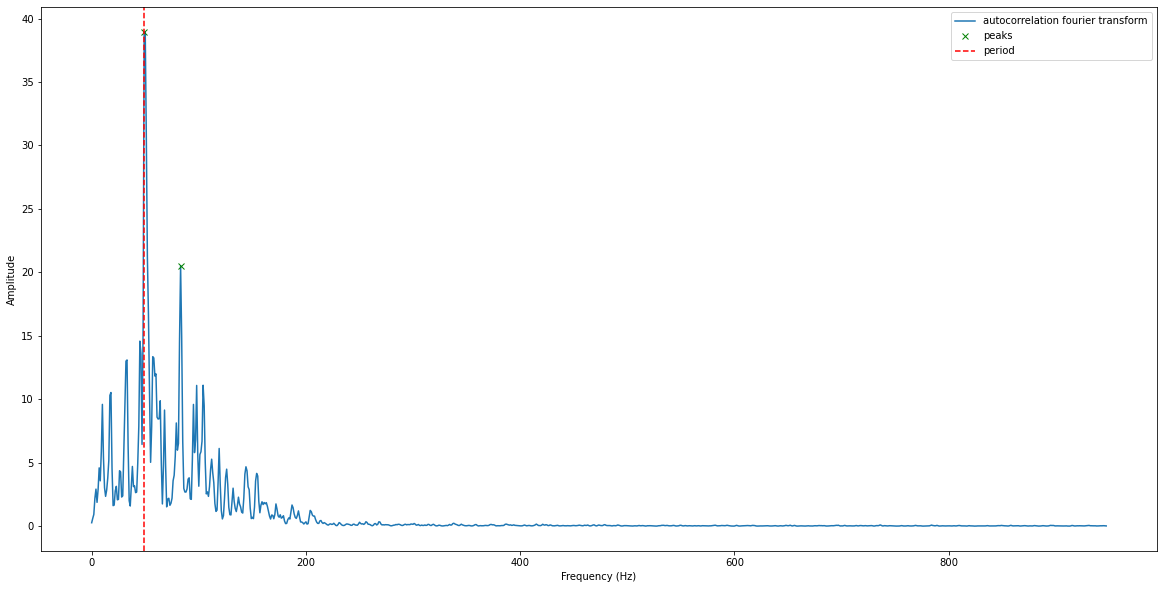

period = 48.99999999999999 pixels, 9.303797468354428 degrees
(1,)


In [20]:
image = bio_image[200]
stack = create_radius_select_stack(image, center_fitted,  target_radius=300, tolerance=0.5)
data = stack[2]
lags, autocorrelation = autocorrelate_radial_ring(data)
period_pixels, period_degrees = find_period_autocorrelation_fft(autocorrelation, 0.8, True)

Find period from image itself

In [21]:
image = bio_image[200]
#period should match that from above function
period_pixels, period_deg = periods_from_image(image, 300, center_fitted)

no peaks =  2
period = 48.99999999999999 pixels, 9.303797468354428 degrees
(1,)


Plot periods for a range of radii

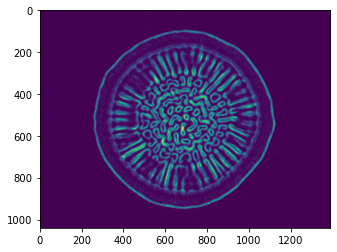

In [25]:
plt.imshow(bio_image[150])

no peaks =  4
period = 4.0 pixels, 2.2929936305732483 degrees
(1,)
no peaks =  3
period = 4.0 pixels, 2.282091917591125 degrees
(1,)
no peaks =  3
period = 3.0000000000000004 pixels, 1.6640986132511557 degrees
(1,)
no peaks =  4
period = 3.0 pixels, 1.684867394695788 degrees
(1,)
no peaks =  4
period = 3.0 pixels, 1.643835616438356 degrees
(1,)
no peaks =  4
period = 3.0 pixels, 1.643835616438356 degrees
(1,)
no peaks =  2
period = 2.9999999999999996 pixels, 1.6191904047976011 degrees
(1,)
no peaks =  2
period = 2.9999999999999996 pixels, 1.6191904047976011 degrees
(1,)
no peaks =  1
period = 3.0 pixels, 1.588235294117647 degrees
(1,)
no peaks =  1
period = 3.0 pixels, 1.565217391304348 degrees
(1,)
no peaks =  1
period = 3.0 pixels, 1.565217391304348 degrees
(1,)
no peaks =  1
period = 3.0 pixels, 1.5472779369627507 degrees
(1,)
no peaks =  3
period = 3.0000000000000004 pixels, 1.549497847919656 degrees
(1,)
no peaks =  2
period = 17.0 pixels, 8.60759493670886 degrees
(1,)
no peaks = 

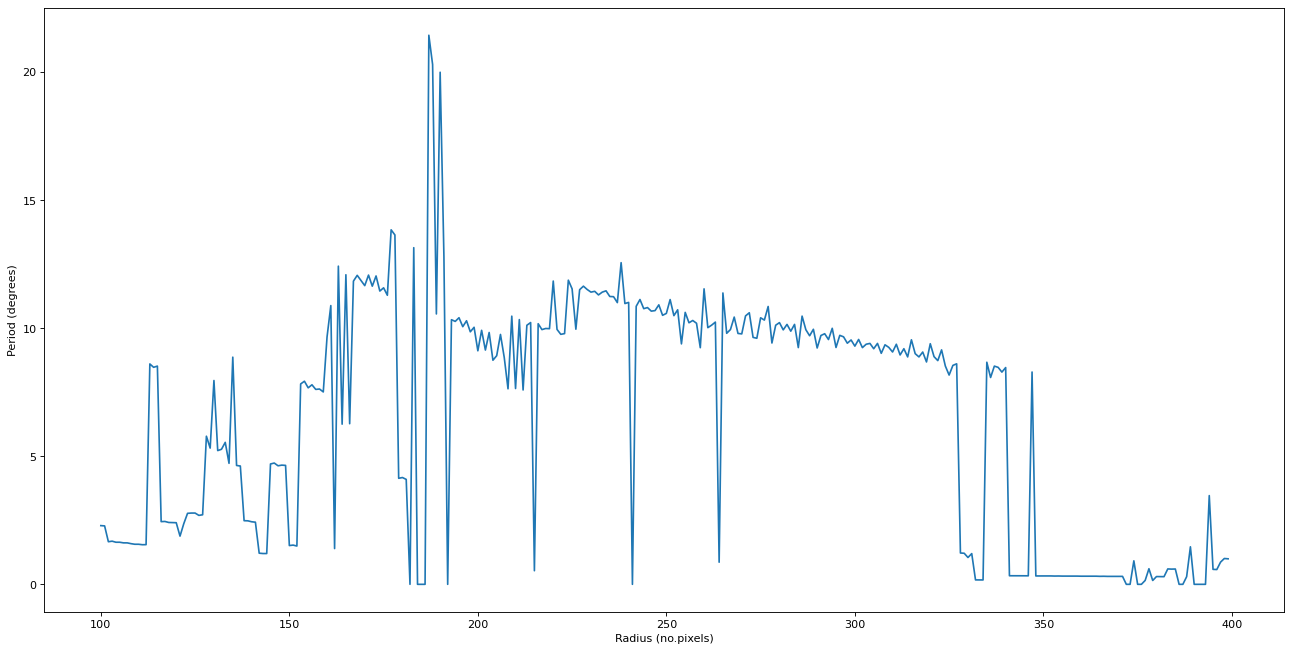

In [26]:
radii, period = periods_multiple_radii(bio_image[150], center_fitted, start_radius = 100, stop_radius = 400, step = 1, plot=True)

Find number of wrinkles

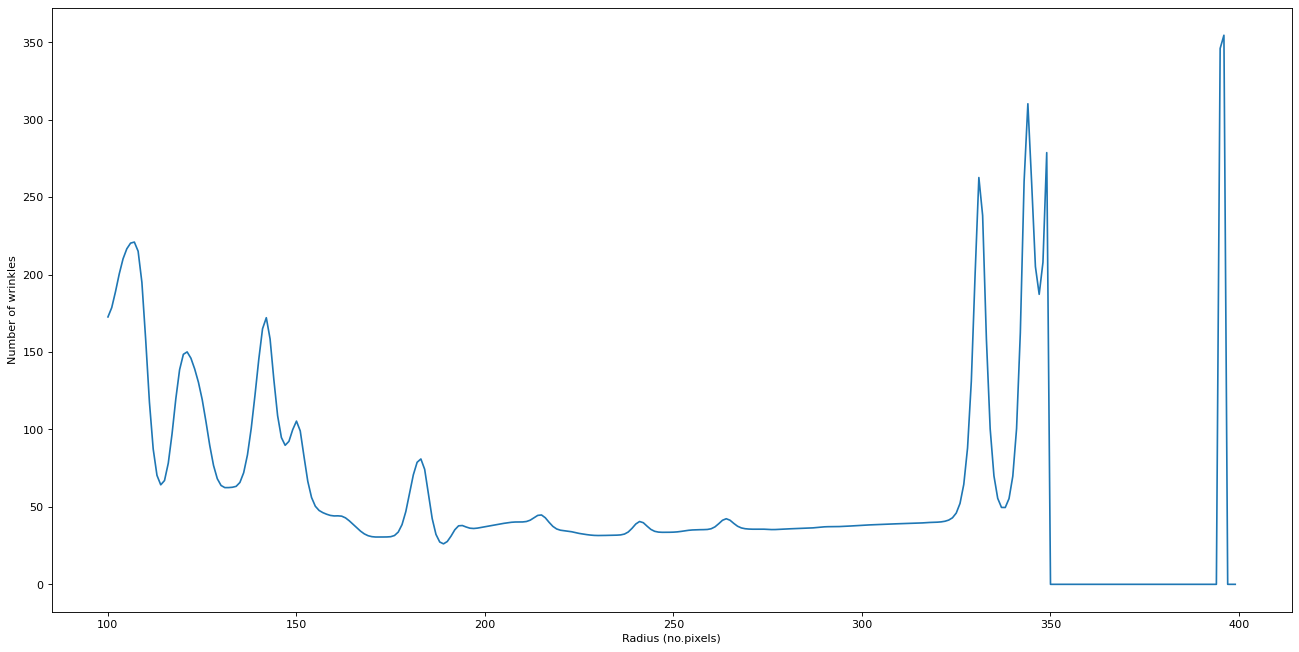

In [28]:
period_smooth = gaussian_filter(period, 2)
period_clipped = np.array(period_smooth)
no_wrinkles = 360/(period_clipped)
no_wrinkles[no_wrinkles > 360] = 0
plt.figure(figsize=(20, 10), dpi=80)
plt.plot(radii, no_wrinkles)
plt.xlabel('Radius (no.pixels)')
plt.ylabel('Number of wrinkles')
plt.show()

Text(0, 0.5, 'Period amoothed (degrees)')

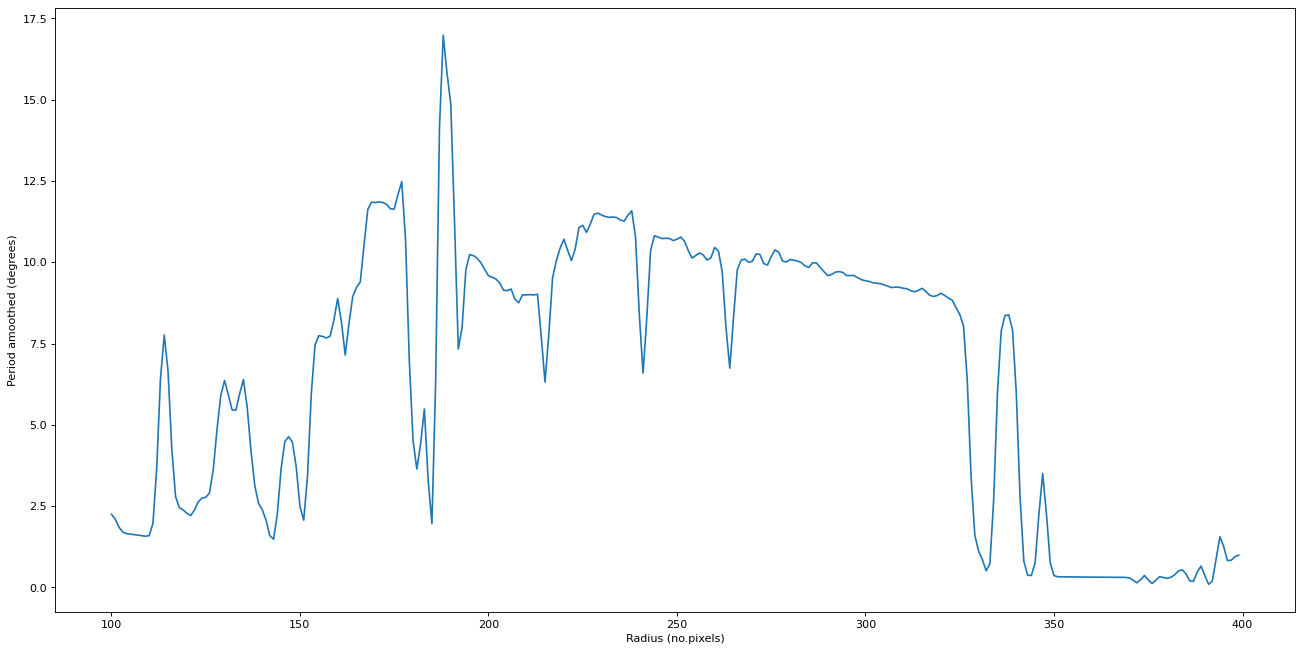

In [29]:
#print(np.shape(np.array(period).flatten()))

period_smooth = gaussian_filter(period, 1)

plt.figure(figsize=(20, 10), dpi=80)
plt.plot(radii, period_smooth)
plt.xlabel('Radius (no.pixels)')
plt.ylabel('Period amoothed (degrees)')